In [16]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [21]:
import cv2

In [22]:

import os


In [23]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [24]:

from tensorflow.keras.preprocessing import image


In [25]:

from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions


In [26]:

#length of earlyblight images in training dataset

len(os.listdir("C:/Users/janu/Desktop/tomato/tomato data/Tomato leaves/Train/Early blight"))


1128

In [27]:

# length of earlyblight images in testing dataset

len(os.listdir("C:/Users/janu/Desktop/tomato/tomato data/Tomato leaves/test/Early blight"))


150

In [28]:

# length of early blight images in validation dataset

len(os.listdir("C:/Users/janu/Desktop/tomato/tomato data/Tomato leaves/validation/Early blight"))


250

In [29]:

img=image.load_img("C:/Users/janu/Desktop/tomato/tomato data/Tomato leaves/validation/Early blight/5d998134-578b-481e-9b88-df0134eb567b___RS_Erly.B 7626.JPG")


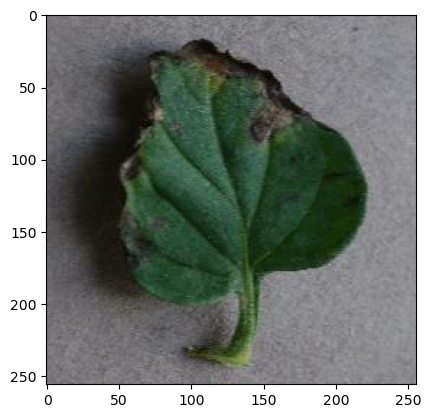

In [30]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [31]:
cv2.imread("C:/Users/janu/Desktop/tomato/tomato data/Tomato leaves/validation/Early blight/5d998134-578b-481e-9b88-df0134eb567b___RS_Erly.B 7626.JPG")


array([[[127, 122, 124],
        [123, 118, 120],
        [118, 113, 115],
        ...,
        [135, 130, 131],
        [139, 134, 135],
        [143, 138, 139]],

       [[124, 119, 121],
        [122, 117, 119],
        [121, 116, 118],
        ...,
        [139, 134, 135],
        [141, 136, 137],
        [143, 138, 139]],

       [[122, 117, 119],
        [122, 117, 119],
        [123, 118, 120],
        ...,
        [145, 140, 141],
        [144, 139, 140],
        [143, 138, 139]],

       ...,

       [[110, 107, 109],
        [117, 114, 116],
        [122, 119, 121],
        ...,
        [135, 130, 131],
        [145, 140, 141],
        [158, 153, 154]],

       [[120, 117, 119],
        [122, 119, 121],
        [125, 122, 124],
        ...,
        [136, 131, 132],
        [144, 139, 140],
        [156, 151, 152]],

       [[136, 133, 135],
        [133, 130, 132],
        [131, 128, 130],
        ...,
        [126, 121, 122],
        [132, 127, 128],
        [141, 136, 137]]

In [32]:
cv2.imread("C:/Users/janu/Desktop/tomato/tomato data/Tomato leaves/validation/Early blight/5d998134-578b-481e-9b88-df0134eb567b___RS_Erly.B 7626.JPG").shape


(256, 256, 3)

In [33]:

train=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)

validation=ImageDataGenerator(preprocessing_function=preprocess_input)


In [34]:
train_dataset=train.flow_from_directory("C:/Users/janu/Desktop/mini project/tomato/tomato data/Tomato leaves/Train",
                                       target_size=(256,256),
                                       batch_size=32)
validate_dataset=validation.flow_from_directory("C:/Users/janu/Desktop/mini project/tomato/tomato data/Tomato leaves/validation",
                                       target_size=(256,256),
                                       batch_size=32)

Found 2856 images belonging to 3 classes.
Found 711 images belonging to 3 classes.


In [35]:

t_img ,label=train_dataset[1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


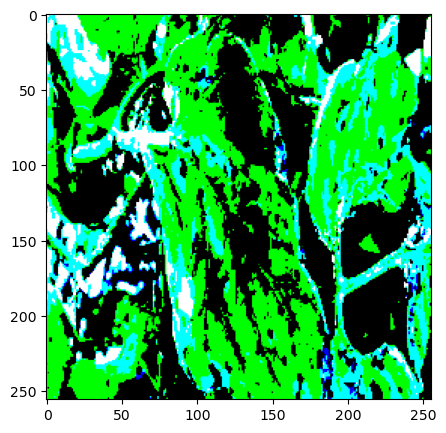

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


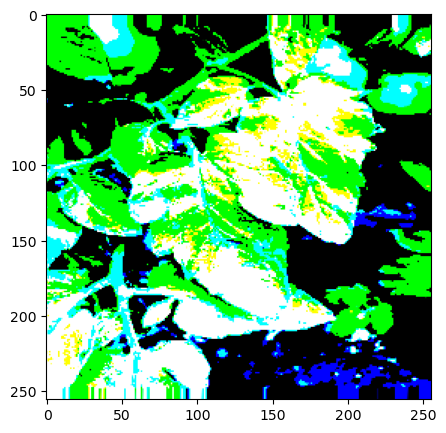

In [36]:
def plotImage(img_arr,label):
    for im, l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()
plotImage(t_img[7:9],label[7:9])

In [37]:

train_dataset.class_indices


{'Early blight': 0, 'Healthy leaves': 1, 'other image': 2}

In [38]:

train_dataset.classes


array([0, 0, 0, ..., 2, 2, 2])

In [39]:

#Building our model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19


In [40]:

base_model=VGG19(input_shape=(256,256,3),include_top=False)


In [41]:

for layer in base_model.layers:
    layer.trainable=False
    

In [42]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [43]:

X=Flatten()(base_model.output)

X=Dense(units=3,activation='softmax')(X)


In [44]:

#Creating our model

model=Model(base_model.input,X)


In [45]:

# Compile the model

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


In [46]:
#Early stopping and Model Check Point
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc=ModelCheckpoint(filepath="best_model.h5",
                  monitor='val_accuracy',
                   min_delta=0.01,
                   patience=3,
                   verbose=1,
                  save_best_only=True)
cb=[es,mc]

In [47]:
his=model.fit(train_dataset,
                        steps_per_epoch=5,
                        epochs=10,
                        verbose=1, 
                        callbacks=cb,
                        validation_data=validate_dataset,
                        validation_steps=5)

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 12.7961 - accuracy: 0.5875 
Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to best_model.h5
5/5 [==============================] - 140s 29s/step - loss: 12.7961 - accuracy: 0.5875 - val_loss: 4.7490 - val_accuracy: 0.7000
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 4.7606 - accuracy: 0.8188 
Epoch 2: val_accuracy improved from 0.70000 to 0.78125, saving model to best_model.h5
5/5 [==============================] - 125s 28s/step - loss: 4.7606 - accuracy: 0.8188 - val_loss: 3.7926 - val_accuracy: 0.7812
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 5.1710 - accuracy: 0.8125 
Epoch 3: val_accuracy did not improve from 0.78125
5/5 [==============================] - 127s 28s/step - loss: 5.1710 - accuracy: 0.8125 - val_loss: 3.9198 - val_accuracy: 0.7312
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 1.0255 - accuracy: 0.9187 
Epoch 4: val_accura

In [48]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

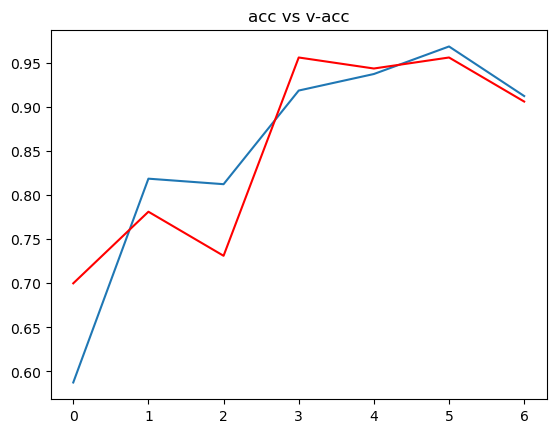

In [49]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

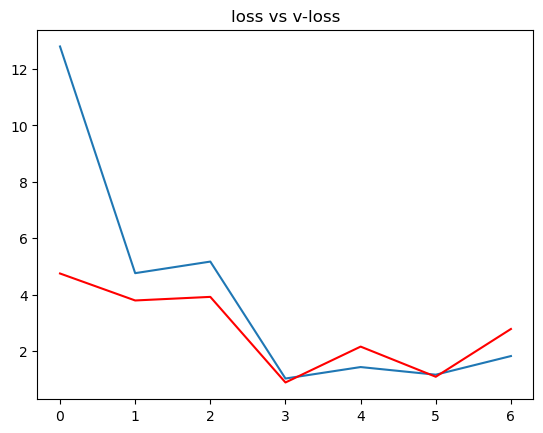

In [50]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [51]:

# load best model
from keras.models import load_model
model=load_model("C:/Users/janu/Downloads/best_model.h5");


In [52]:
acc=model.evaluate(validate_dataset)[1]
print(f"The accuracy of your model is {acc*100} %")

23/23 [==============================] - 269s 12s/step - loss: 0.3858 - accuracy: 0.9719
The accuracy of your model is 97.18706011772156 %


In [53]:

ref=dict(zip(list(train_dataset.class_indices.values()),list(train_dataset.class_indices.keys())))
import numpy as np

In [54]:

def prediction(path):
    img=image.load_img(path, target_size=(256,256))
    i=image.img_to_array(img)
    im=preprocess_input(i)
    img=np.expand_dims(im,axis=0)
    pred=np.argmax(model.predict(img))
    print(f"The image belongs to {ref[pred]}")


In [59]:

path = "C:/Users/janu/Desktop/tomato/tomato data/Tomato leaves/test/Healthy leaves/b3e24070-34b9-4dcb-8c84-026affadfb4b___GH_HL Leaf 360.JPG"

prediction(path)


1/1 [==============================] - 1s 501ms/step
The image belongs to Healthy leaves


In [60]:

path="C:/Users/janu/Desktop/tomato/tomato data/Tomato leaves/Train/Early blight/150cfe75-133e-4e98-90cb-de96a8120c03___RS_Erly.B 9414.JPG"

prediction(path)

1/1 [==============================] - 1s 656ms/step
The image belongs to Early blight


In [61]:
path = "C:/Users/janu/Desktop/test/leaf curl virus.jpg"
prediction(path)

1/1 [==============================] - 1s 545ms/step
The image belongs to other image


In [62]:
path = "C:/Users/janu/Pictures/Camera Roll/WIN_20201105_02_18_33_Pro.jpg"
prediction(path)

1/1 [==============================] - 1s 554ms/step
The image belongs to other image
